In [1]:
%matplotlib inline

In [2]:
import gym

from lab.agents import QLearningAgent
from lab.core import Experiment

## Running an experiment

In [3]:
env = gym.make('FrozenLake-v0')

In [4]:
agent = QLearningAgent(
    num_actions=env.action_space.n,
    num_states=env.observation_space.n,
    learning_rate=0.1,
    exploration_rate=0.5,
    discount_factor=0.99
)

In [5]:
experiment = Experiment(
    environment=env,
    agent=agent,
    num_iterations=250,
    train_steps=100,
    eval_steps=100,
    max_steps_per_episode=100,
    seed=0
)

In [6]:
stats = experiment.run()

## Plotting the results

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from lab.utils.plotting import smooth

In [8]:
WINDOW_SIZE = 15
eval_returns = smooth(stats['eval_average_returns'], WINDOW_SIZE, method='mirror')
train_returns = smooth(stats['train_average_returns'], WINDOW_SIZE, method='mirror')

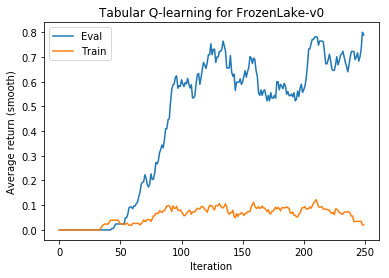

In [9]:
fig, ax = plt.subplots()
plt.plot(eval_returns, label='Eval')
plt.plot(train_returns,label='Train')
ax.legend()
plt.title('Tabular Q-learning for FrozenLake-v0')
plt.ylabel('Average return (smooth)')
plt.xlabel('Iteration')
plt.show()